## フェスマッチ（オープン）のブキ使用率を求める

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from packages.japanize import japanize
import packages.db as db
import packages.i18n as i18n
import packages.image as image
import packages.definitions as d
import packages.utils as u
import packages.visualize as v

locale = i18n.Locale.JA
lobby = d.Lobby.SPLATFEST_OPEN
date_from = dt.date(2023, 5, 6)
date_to = date_from + dt.timedelta(days=3)
battles = db.load_battles(lobby=lobby, date_from=date_from, date_to=date_to)

In [3]:
print(f"バトル数: {len(battles)}")

バトル数: 18152


In [4]:
players = u.to_players(battles)

### ブキ使用率

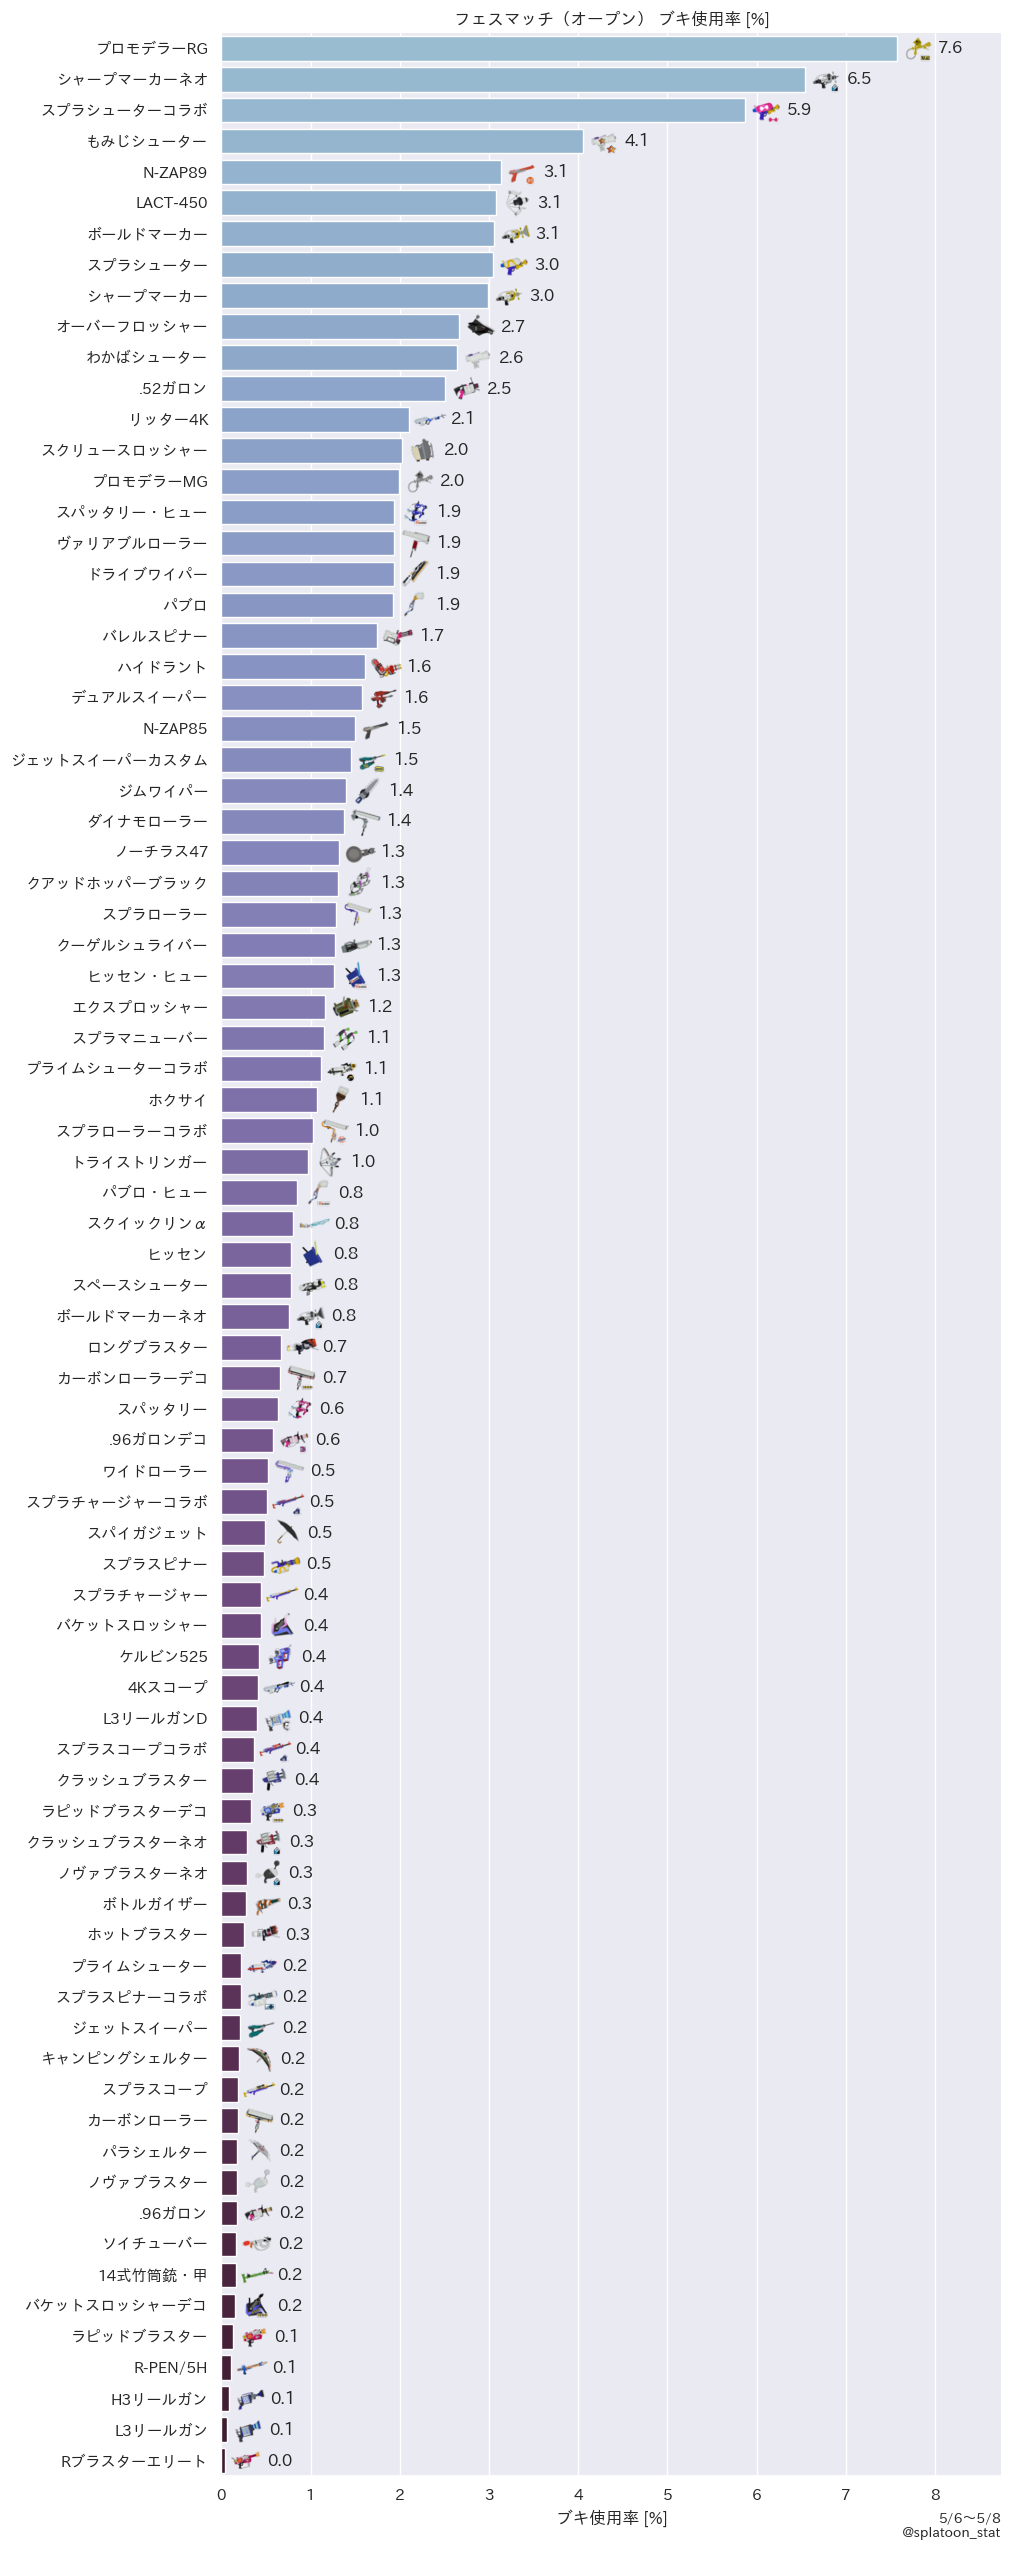

In [7]:
usage = players["weapon"].value_counts(normalize=True).mul(100).reset_index().set_axis(["weapon", "usage"], axis=1)

sns.set_theme()
japanize()

translations = i18n.get_translations(custom_translation_df=pd.DataFrame([
    { "key": "usage", "name-ja": "ブキ使用率 [%]", "name-en": "Usage [%]" },
]), locale=locale)
match locale:
    case i18n.Locale.JA: title = f"{translations[lobby.value]} ブキ使用率 [%]"
    case i18n.Locale.EN: title = f"Weapon usage in {translations[lobby.value]} [%]"

width = 10
height = len(usage) * 0.32

g = sns.catplot(
    data=usage,
    x="usage",
    y="weapon",
    kind="bar",
    palette=sns.color_palette("ch:s=.9,r=-.6,l=.7,h=1", len(usage)),
    height=height,
    aspect=width/height,
)
ax = g.ax

xmin, xmax = ax.get_xlim()
image_offset = xmax * 0.03

xkeys, ykeys = u.get_ax_ticklabels(ax)
yticklabels = [translations[x] for x in ykeys]

ax.set(
    title=title,
    ylabel="",
    xlabel=translations["usage"],
    xlim=(xmin, xmax * 1.1),
)
ax.bar_label(ax.containers[0], fmt="%.1f", padding=30)
ax.yaxis.set_ticklabels(yticklabels)

yvalues = usage["usage"].to_list()
for i, (key, value) in enumerate(zip(ykeys, yvalues)):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.65)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(value + image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, g.fig, i18n.data_to_duration_str(battles, locale), 1.0)

plt.show()

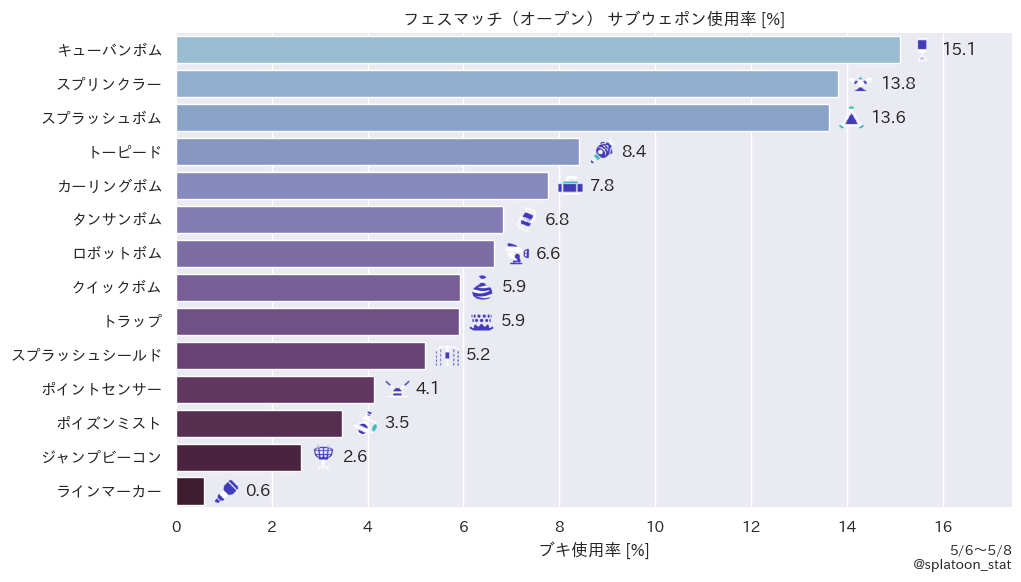

In [8]:
usage = players["sub-weapon"].value_counts(normalize=True).mul(100).reset_index().set_axis(["weapon", "usage"], axis=1)

sns.set_theme()
japanize()

translations = i18n.get_translations(custom_translation_df=pd.DataFrame([
    { "key": "usage", "name-ja": "ブキ使用率 [%]", "name-en": "Usage [%]" },
]), locale=locale)
match locale:
    case i18n.Locale.JA: title = f"{translations[lobby.value]} サブウェポン使用率 [%]"
    case i18n.Locale.EN: title = f"Sub weapon usage in {translations[lobby.value]} [%]"

width = 10
height = len(usage) * 0.4

g = sns.catplot(
    data=usage,
    x="usage",
    y="weapon",
    kind="bar",
    palette=sns.color_palette("ch:s=.9,r=-.6,l=.7,h=1", len(usage)),
    height=height,
    aspect=width/height,
)
ax = g.ax

xmin, xmax = ax.get_xlim()
image_offset = xmax * 0.03

xkeys, ykeys = u.get_ax_ticklabels(ax)
yticklabels = [translations[x] for x in ykeys]

ax.set(
    title=title,
    ylabel="",
    xlabel=translations["usage"],
    xlim=(xmin, xmax * 1.1),
)
ax.bar_label(ax.containers[0], fmt="%.1f", padding=30)
ax.yaxis.set_ticklabels(yticklabels)

yvalues = usage["usage"].to_list()
for i, (key, value) in enumerate(zip(ykeys, yvalues)):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.5)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(value + image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, g.fig, i18n.data_to_duration_str(battles, locale), 1.0)

plt.show()


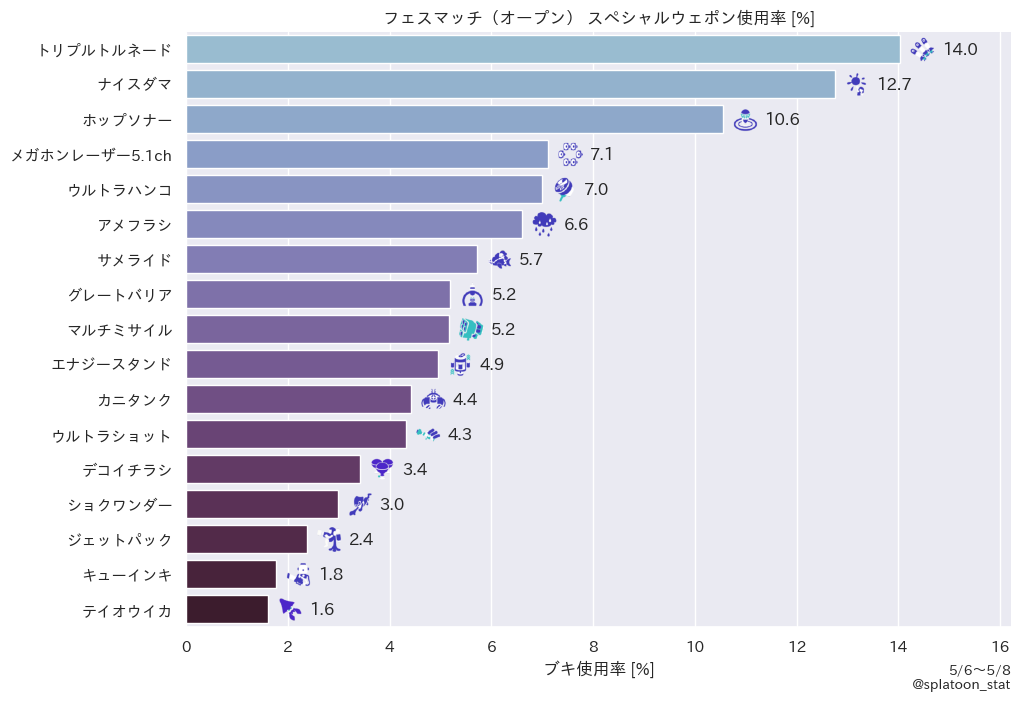

In [9]:
usage = players["special-weapon"].value_counts(normalize=True).mul(100).reset_index().set_axis(["weapon", "usage"], axis=1)

sns.set_theme()
japanize()

translations = i18n.get_translations(custom_translation_df=pd.DataFrame([
    { "key": "usage", "name-ja": "ブキ使用率 [%]", "name-en": "Usage [%]" },
]), locale=locale)
match locale:
    case i18n.Locale.JA: title = f"{translations[lobby.value]} スペシャルウェポン使用率 [%]"
    case i18n.Locale.EN: title = f"Special weapon usage in {translations[lobby.value]} [%]"

width = 10
height = len(usage) * 0.4

g = sns.catplot(
    data=usage,
    x="usage",
    y="weapon",
    kind="bar",
    palette=sns.color_palette("ch:s=.9,r=-.6,l=.7,h=1", len(usage)),
    height=height,
    aspect=width/height,
)
ax = g.ax

xmin, xmax = ax.get_xlim()
image_offset = xmax * 0.03

xkeys, ykeys = u.get_ax_ticklabels(ax)
yticklabels = [translations[x] for x in ykeys]

ax.set(
    title=title,
    ylabel="",
    xlabel=translations["usage"],
    xlim=(xmin, xmax * 1.1),
)
ax.bar_label(ax.containers[0], fmt="%.1f", padding=30)
ax.yaxis.set_ticklabels(yticklabels)

yvalues = usage["usage"].to_list()
for i, (key, value) in enumerate(zip(ykeys, yvalues)):
    image_path = image.get_image_path(key)
    img = OffsetImage(plt.imread(image_path), zoom=.5)
    img.image.axes = ax
    ab = AnnotationBbox(img, (0, 0), xybox=(value + image_offset, i), frameon=False)
    ax.add_artist(ab)

u.credit(ax, g.fig, i18n.data_to_duration_str(battles, locale), 1.0)

plt.show()